In [18]:
import pandas as pd
import numpy as np
import glob

In [19]:
path = 'crawl_json/'
frames = []
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.      
    with open(filename, encoding='utf-8', mode='r') as currentFile:
        frames.append(pd.read_json(currentFile, orient='index'))

df = pd.concat(frames)
df.drop(['authors', 'image_url', 'localpath', 'title_page', 'title_rss'], axis = 1, inplace = True)
df.head(2)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url
0,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 14:58:03",Neighbors » Forums » General Discussion » Arti...,en,neighbors.denverpost.com,Neighbors » Forums » General Discussion » Arti...,"Denver Post poll: Most Coloradans support NRA,...",http://neighbors.denverpost.com/viewtopic.php?...
1,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 16:15:00",Neighbors » Forums » Sports News » Denver Bron...,en,neighbors.denverpost.com,Neighbors » Forums » Sports News » Denver Bron...,Elvis Dumervil agrees to contract with Baltimo...,http://neighbors.denverpost.com/viewtopic.php?...


In [20]:
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
is_noun = lambda pos: pos[:2] == 'NN'
nouns = []
df['tokenized_words'] = df['maintext'].apply(nltk.word_tokenize)

for element in df["tokenized_words"]:
    nouns.append([word for (word, pos) in nltk.pos_tag(element) if is_noun(pos)]) 

df["nouns"] = nouns     #not optimal yet but doe the job

df.head(3)



,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,tokenized_words,nouns
0,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 14:58:03",Neighbors » Forums » General Discussion » Arti...,en,neighbors.denverpost.com,Neighbors » Forums » General Discussion » Arti...,"Denver Post poll: Most Coloradans support NRA,...",http://neighbors.denverpost.com/viewtopic.php?...,"[Neighbors, », Forums, », General, Discussion,...","[Neighbors, Forums, », General, Discussion, »,..."
1,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 16:15:00",Neighbors » Forums » Sports News » Denver Bron...,en,neighbors.denverpost.com,Neighbors » Forums » Sports News » Denver Bron...,Elvis Dumervil agrees to contract with Baltimo...,http://neighbors.denverpost.com/viewtopic.php?...,"[Neighbors, », Forums, », Sports, News, », Den...","[Neighbors, Forums, », Sports, News, », Denver..."
2,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 15:43:08",Art historian Kelly Grovier looks at images th...,en,www.bbc.com,Art historian Kelly Grovier looks at images t...,BBC - Culture - The painting that tricks the eye,http://www.bbc.com/culture/story/20160304-the-...,"[Art, historian, Kelly, Grovier, looks, at, im...","[Art, historian, Kelly, Grovier, images, frame..."


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
def vectorize_texts(list_of_strings):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(list_of_strings)
    transformer = TfidfTransformer(smooth_idf=False)
    tfidf = transformer.fit_transform(X)
    return tfidf
    

In [24]:
all_article_nouns = []
for i, element in enumerate(nouns):
    for j in range(len(element)):
        all_article_nouns.append(element[j])

vectorized_text = vectorize_texts(all_article_nouns)

In [25]:
print(vectorized_text)
print(vectorized_text[0])

  (0, 10643)	1.0
  (1, 6126)	1.0
  (3, 6439)	1.0
  (4, 4638)	1.0
  (6, 1063)	1.0
  (7, 15363)	1.0
  (8, 13304)	1.0
  (9, 8253)	1.0
  (10, 11957)	1.0
  (11, 13304)	1.0
  (12, 8253)	1.0
  (13, 11957)	1.0
  (14, 13449)	1.0
  (15, 8253)	1.0
  (16, 11957)	1.0
  (17, 13449)	1.0
  (18, 8253)	1.0
  (19, 11957)	1.0
  (20, 13449)	1.0
  (21, 8253)	1.0
  (22, 11957)	1.0
  (23, 13304)	1.0
  (24, 8253)	1.0
  (25, 11957)	1.0
  (26, 13449)	1.0
  :	:
  (116915, 776)	1.0
  (116916, 1969)	1.0
  (116917, 775)	1.0
  (116918, 15446)	1.0
  (116921, 4195)	1.0
  (116922, 2240)	1.0
  (116923, 11112)	1.0
  (116924, 2854)	1.0
  (116925, 3428)	1.0
  (116926, 9147)	1.0
  (116927, 2638)	1.0
  (116928, 14908)	1.0
  (116929, 13538)	1.0
  (116930, 9646)	1.0
  (116931, 17222)	1.0
  (116932, 9901)	1.0
  (116933, 4048)	1.0
  (116934, 13962)	1.0
  (116935, 15903)	1.0
  (116936, 5736)	1.0
  (116937, 433)	1.0
  (116938, 10303)	1.0
  (116939, 4827)	1.0
  (116940, 8382)	1.0
  (116941, 12324)	1.0
  (0, 10643)	1.0


In [26]:
from sklearn.cluster import KMeans

In [27]:
def cluster_texts(num_clusters, tfidf):
    #perform kmeans clustering for range of clusters
    print('Beginning KMeans Clustering, number of clusters = ', num_clusters, '\n') 
    km = KMeans(n_clusters=num_clusters, max_iter = 100, verbose = 2, n_init = 1).fit(tfidf)
    return km

In [28]:
kmeans12 = cluster_texts(12, vectorized_text)

Beginning KMeans Clustering, number of clusters =  12 

Initialization complete
Iteration 0, inertia 227434.6067979291
Iteration 1, inertia 112466.31513918356
Iteration 2, inertia 112466.17596507806
Converged at iteration 2: strict convergence.


In [29]:
df_kmeans = pd.DataFrame()
df_kmeans["kmeans12"] = kmeans12.labels_

In [30]:
df_kmeans.value_counts()

kmeans12
0           115199
10             649
6              353
2              186
3              175
4               67
7               67
11              59
1               54
5               52
8               46
9               35
dtype: int64

In [31]:
import seaborn

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11')]

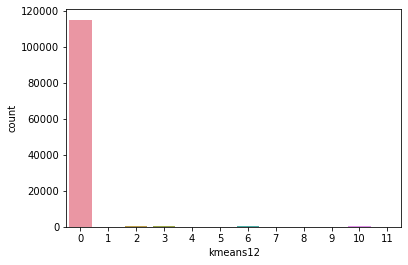

In [32]:
axis = seaborn.countplot(x= 'kmeans12', data=df_kmeans)
axis.set_xticklabels(axis.get_xticklabels(), rotation=0)

In [42]:
def get_most_common_words(df, df_column, num_words):
    common_words = []
    for i in range(0,12):
        common = Counter(" ".join(df.loc[df_column == i]['stemmed']).split()).most_common(num_words)
        for j in common:
            dict_ = {}
            dict_['cluster'] = i
            dict_['word'] = j[0]
            common_words.append(dict_)
    return common_words

In [43]:
get_most_common_words(df_kmeans, df_kmeans['kmeans12'], 25)

KeyError: 'stemmed'

In [41]:
df_clusters = pd.concat([df, df_kmeans['kmeans12']], axis = 1, sort = False)

kmeans12_cluster3 = pd.DataFrame(df_clusters['kmeans12'].loc[df_clusters['kmeans12'] == 0])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:

axis = seaborn.countplot(x= 'kmeans12', data=df_kmeans)
axis.set_xticklabels(axis.get_xticklabels(), rotation=0)